<a href="https://colab.research.google.com/github/AI-Lovers04/BlackFridayDataset/blob/master/BlackFriday_eda_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Black Friday Predictions

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Importing the Essential Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn')
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

In [0]:
train = pd.read_csv('/content/drive/My Drive/datasets/Black Friday/train.csv')
test = pd.read_csv('/content/drive/My Drive/datasets/Black Friday/test.csv')

## train data

In [0]:
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [0]:
train.shape

(550068, 12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

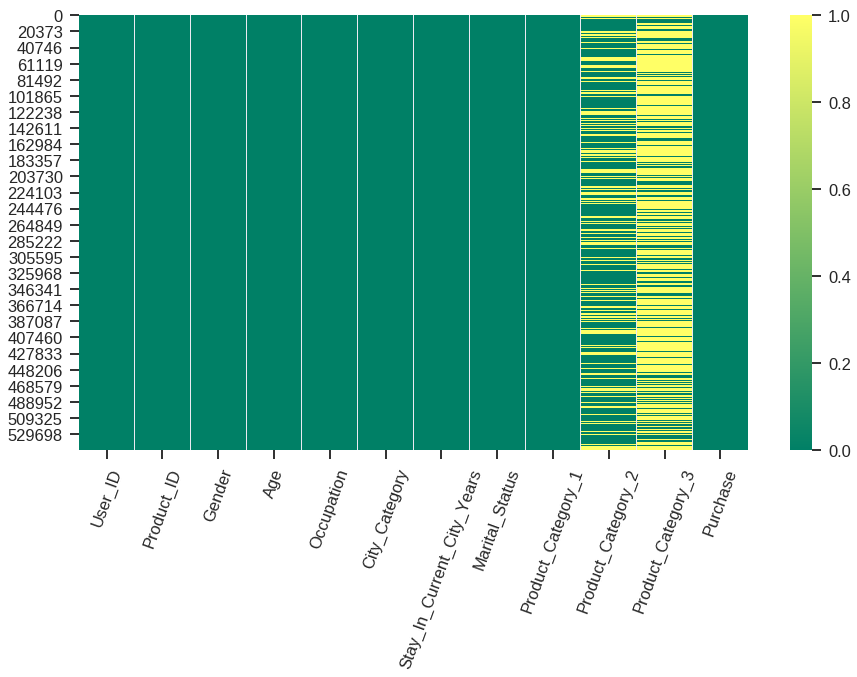

In [0]:
plt.figure(figsize = (15, 8))
sns.heatmap(train.isnull(), cmap = 'summer')
plt.xticks(rotation = '70')

In [0]:
train.isnull().sum()[train.isnull().sum() != 0] 

Product_Category_2    173638
Product_Category_3    383247
dtype: int64

In [0]:
train.isnull().sum()[train.isnull().sum() != 0] / train.shape[0] * 100

Product_Category_2    31.566643
Product_Category_3    69.672659
dtype: float64

## test data

In [0]:
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [0]:
test.shape

(233599, 11)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

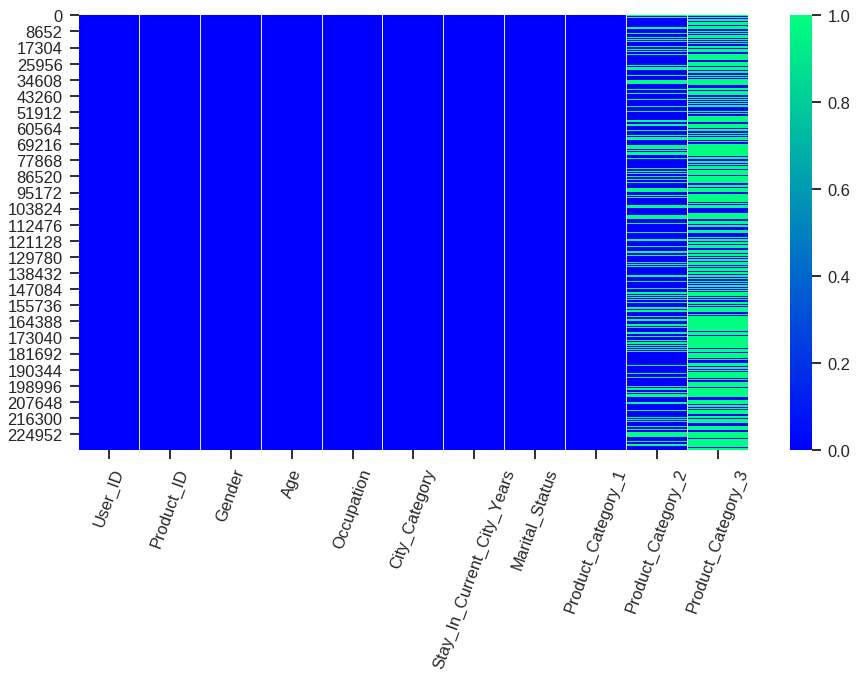

In [0]:
plt.figure(figsize = (15, 8))
sns.heatmap(test.isnull(), cmap = 'winter')
plt.xticks(rotation = '70')

In [0]:
test.isnull().sum()[test.isnull().sum() != 0]

Product_Category_2     72344
Product_Category_3    162562
dtype: int64

In [0]:
test.isnull().sum()[test.isnull().sum() != 0] / test.shape[0] * 100

Product_Category_2    30.969311
Product_Category_3    69.590195
dtype: float64

# Finding new realtionships between features and label

## Categorized UserID based on their purchasing power

In [0]:
'''user_id_mapping = {}
total_purchase_per_customer = train.groupby('User_ID')['Purchase'].sum()'''

In [0]:
#values = total_purchase_per_customer.iteritems()

In [0]:
#np.percentile(total_purchase_per_customer, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([  146570.,   205272.,   279288.,   383455.,   521213.,   698842.,
         942900.,  1355245.,  2069404., 10536909.])

In [0]:
'''for key, val in values:
    if val <= 146570:
        user_id_mapping[key] = 1
    elif val <= 205272:
        user_id_mapping[key] = 2
    elif val <= 279288:
        user_id_mapping[key] = 3
    elif val <= 383455:
        user_id_mapping[key] = 4
    elif val <= 521213:
        user_id_mapping[key] = 5
    elif val <= 698842:
        user_id_mapping[key] = 6
    elif val <= 942900:
        user_id_mapping[key] = 7
    elif val <=1355245:
        user_id_mapping[key] = 8
    elif val <= 2069404:
        user_id_mapping[key] = 9
    else:
        user_id_mapping[key] = 10'''

In [0]:
'''def get_customer_category(user_id):
    if user_id in user_id_mapping:
        return user_id_mapping[user_id]
    return 5'''

In [0]:
#data['User_Category'] = map(lambda user_id : get_customer_category(user_id), data['User_ID'])

In [0]:
#train['User_Category'] = [get_customer_category(train['User_ID'][i]) for i in train.index]

In [0]:
#test['User_Category'] = [get_customer_category(test['User_ID'][i]) for i in test.index]

## Categorized User based on their average purchase

In [0]:
user_id_mapping = {}
average_purchase_per_customer = train.groupby('User_ID')['Purchase'].mean()

In [0]:
values = average_purchase_per_customer.iteritems()

In [0]:
np.percentile(average_purchase_per_customer, [5, 20, 50, 85, 100])

array([ 6828.02413672,  8018.80310881,  9386.20833333, 11419.2365942 ,
       18577.89361702])

In [0]:
for key, val in values:
    if val <= 6828:
        user_id_mapping[key] = 1
    elif val <= 8018:
        user_id_mapping[key] = 2
    elif val <= 9386:
        user_id_mapping[key] = 3
    elif val <= 11419:
        user_id_mapping[key] = 4
    else:
        user_id_mapping[key] = 5   

In [0]:
def get_customer_category(user_id):
    if user_id in user_id_mapping:
        return user_id_mapping[user_id]
    return 5

In [0]:
train['User_Category'] = [get_customer_category(train['User_ID'][i]) for i in train.index]
test['User_Category'] = [get_customer_category(test['User_ID'][i]) for i in test.index]

## Product_ID based on their average purchase

In [0]:
product_id_mapping = {}
product_id_avg_purchase = train.groupby('Product_ID')['Purchase'].mean()

In [0]:
values = product_id_avg_purchase.iteritems()

In [0]:
np.percentile(product_id_avg_purchase, [30, 60, 75, 90, 100])

array([ 5794.23012552,  7529.68518519, 10154.06579061, 14020.03030303,
       21256.50549451])

In [0]:
for key, val in values:
    if val <= 5794:
        product_id_mapping[key] = 1
    elif val <= 7529:
        product_id_mapping[key] = 2
    elif val <= 10154:
        product_id_mapping[key] = 3
    elif val <= 14020:
        product_id_mapping[key] = 4
    else:
        product_id_mapping[key] = 5 

In [0]:
def get_product_category(product_id):
    if product_id in product_id_mapping:
       return product_id_mapping[product_id]
    return 5

In [0]:
train['Product_Category'] = [get_product_category(train['Product_ID'][i]) for i in train.index]
test['Product_Category'] = [get_product_category(test['Product_ID'][i]) for i in test.index]

## product category 1 based on their average purchase

In [0]:
'''product_category_1_mapping = {}
product_category_1 = train.groupby('Product_Category_1')['Purchase'].mean()'''

In [0]:
#values = product_category_1.iteritems()

In [0]:
#np.percentile(product_category_1, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([  687.2086691 ,  2133.89957167,  4171.54721546,  6995.41011789,
       10133.73262475, 12007.81152577, 13954.16412797, 14931.83658459,
       15891.19965477, 19675.57092683])

In [0]:
'''for key, val in values:
  if val <= 687:
    product_category_1_mapping[key] = 1
  elif val <= 2133:
    product_category_1_mapping[key] = 2
  elif val <= 4171:
    product_category_1_mapping[key] = 3
  elif val <= 6995:
    product_category_1_mapping[key] = 4
  elif val <= 10133:
    product_category_1_mapping[key] = 5
  elif val <= 12007:
    product_category_1_mapping[key] = 6
  elif val <= 13954:
    product_category_1_mapping[key] = 7
  elif val <= 14931:
    product_category_1_mapping[key] = 8
  elif val <= 15891:
    product_category_1_mapping[key] = 9
  else:
    product_category_1_mapping[key] = 10 '''               

In [0]:
'''def get_product_category_1(product_category):
    if product_category in product_category_1_mapping:
        return product_category_1_mapping[product_category]
    return 10    '''

In [0]:
'''train['Product_1'] = [get_product_category_1(train['Product_Category_1'][i]) for i in train.index]
test['Product__1'] = [get_product_category_1(test['Product_Category_1'][i]) for i in test.index]'''

# merge train and test data and handling missing values

In [0]:
data = pd.concat([train, test], sort = False)

In [0]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,User_Category,Product_Category,Product_1
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0,4,4,5
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0,4,5,7
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0,4,1,2
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0,4,1,2
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0,4,3,5


In [0]:
data.shape

(783667, 15)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

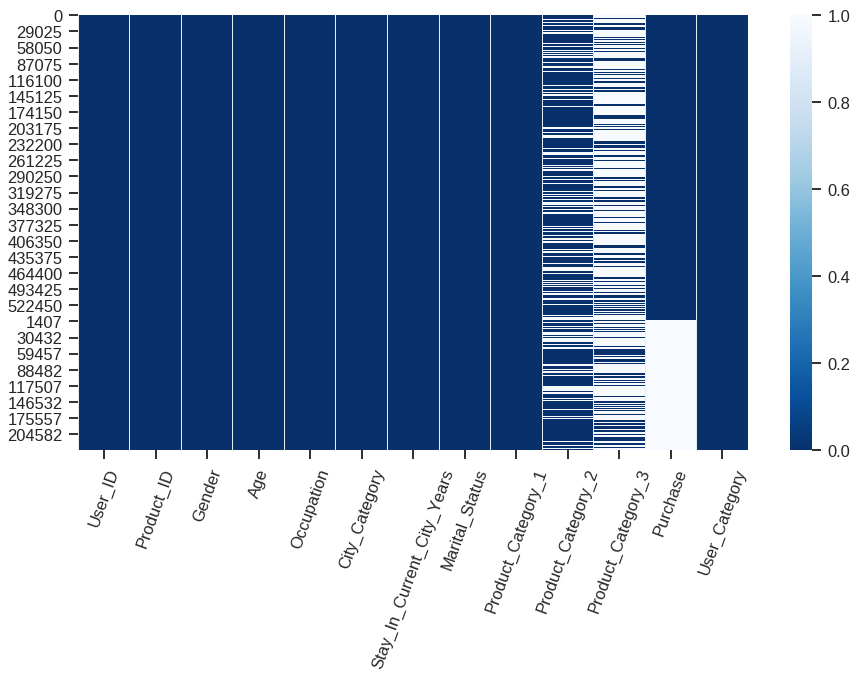

In [0]:
plt.figure(figsize = (15, 8))
sns.heatmap(data.isnull(), cmap = 'Blues_r')
plt.xticks(rotation = '70')

In [0]:
data.isnull().sum()[data.isnull().sum() != 0][ : -1] / data.shape[0] * 100

Product_Category_2    31.388587
Product_Category_3    69.648078
dtype: float64

In [0]:
data.dtypes.value_counts()

object     5
int64      4
float64    3
dtype: int64

## Handling Missing Values

In [0]:
#data['Product_Category_2'] = data['Product_Category_2'].fillna(np.mean(data['Product_Category_2']))
#data['Product_Category_3'] = data['Product_Category_3'].fillna(np.mean(data['Product_Category_3']))

In [0]:
data = data.fillna(0)

In [0]:
data.isnull().sum()[data.isnull().sum() != 0]

Series([], dtype: int64)

# EDA

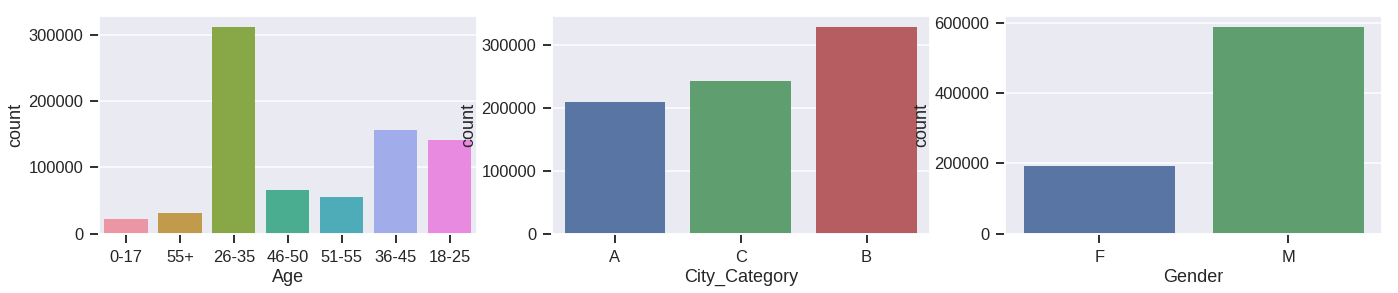

In [0]:
plt.figure(figsize = (23, 4))

plt.subplot2grid((1, 3), (0, 0))
sns.countplot(data['Age'])

plt.subplot2grid((1, 3), (0, 1))
sns.countplot(data['City_Category'])

plt.subplot2grid((1, 3), (0, 2))
sns.countplot(data['Gender'])

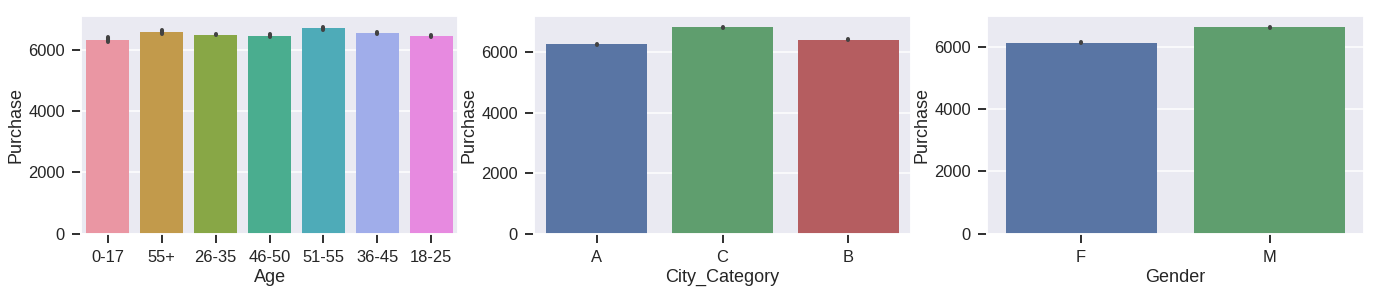

In [0]:
plt.figure(figsize = (23, 4))

plt.subplot2grid((1, 3), (0, 0))
sns.barplot('Age', 'Purchase', data = data)

plt.subplot2grid((1, 3), (0, 1))
sns.barplot('City_Category', 'Purchase', data = data)

plt.subplot2grid((1, 3), (0, 2))
sns.barplot('Gender', 'Purchase', data = data)

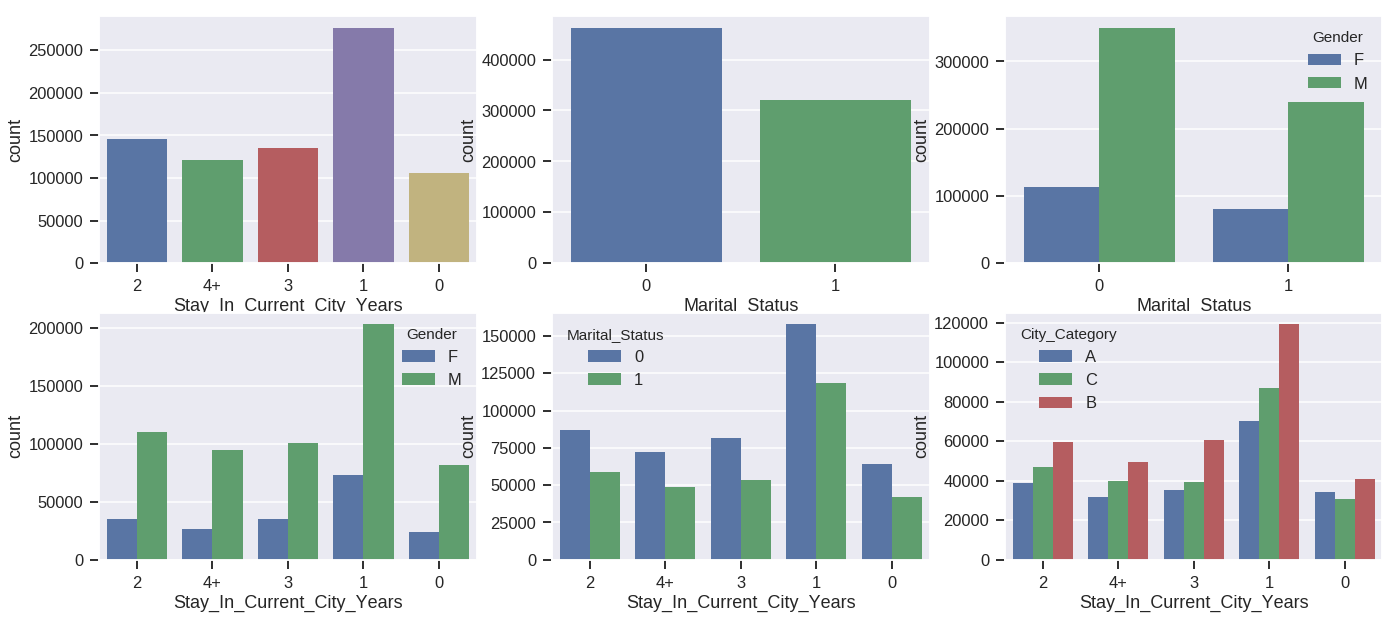

In [0]:
plt.figure(figsize = (23, 10))

plt.subplot2grid((2, 3), (0, 0))
sns.countplot(data['Stay_In_Current_City_Years'])

plt.subplot2grid((2, 3), (0, 1))
sns.countplot(data['Marital_Status'])

plt.subplot2grid((2, 3), (0, 2))
sns.countplot(data['Marital_Status'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 0))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 1))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['Marital_Status'])

plt.subplot2grid((2, 3), (1, 2))
sns.countplot(data['Stay_In_Current_City_Years'], hue = data['City_Category'])

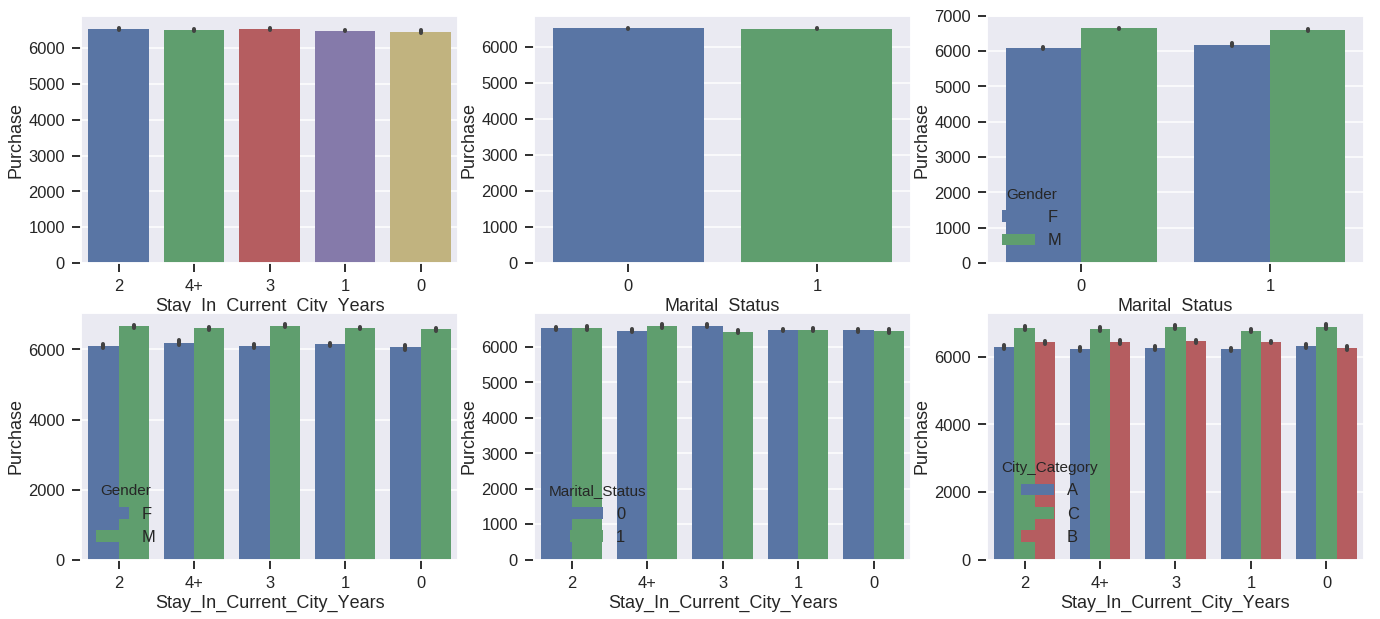

In [0]:
plt.figure(figsize = (23, 10))

plt.subplot2grid((2, 3), (0, 0))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'])

plt.subplot2grid((2, 3), (0, 1))
sns.barplot(data['Marital_Status'], data['Purchase'])

plt.subplot2grid((2, 3), (0, 2))
sns.barplot(data['Marital_Status'], data['Purchase'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 0))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['Gender'])

plt.subplot2grid((2, 3), (1, 1))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['Marital_Status'])

plt.subplot2grid((2, 3), (1, 2))
sns.barplot(data['Stay_In_Current_City_Years'], data['Purchase'], hue = data['City_Category'])

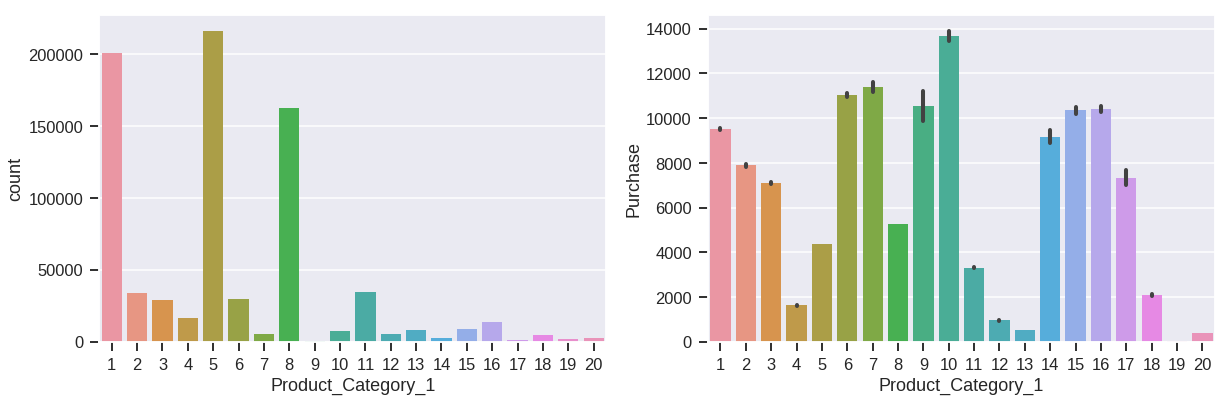

In [0]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Product_Category_1'])

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Product_Category_1'], data['Purchase'])

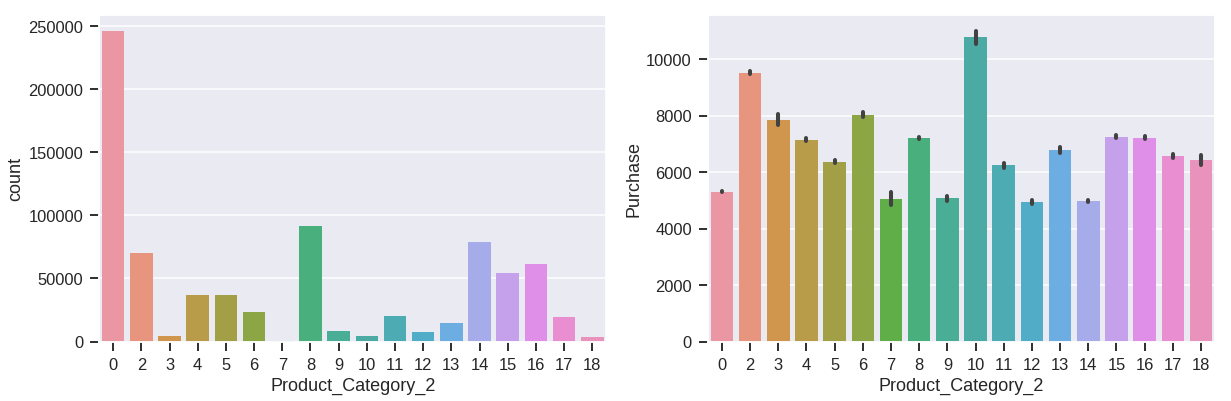

In [0]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Product_Category_2'].astype('int'))

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Product_Category_2'].astype('int'), data['Purchase'])

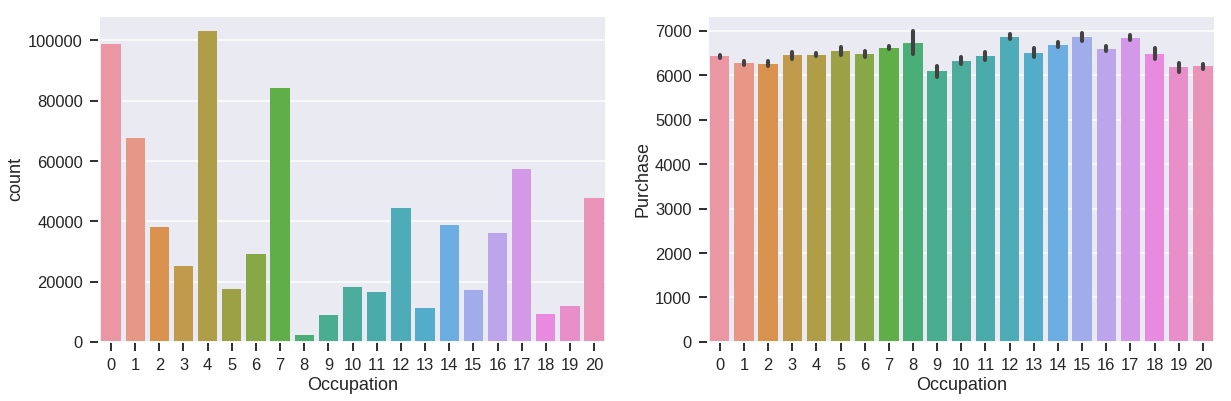

In [0]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Occupation'])

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Occupation'], data['Purchase'])

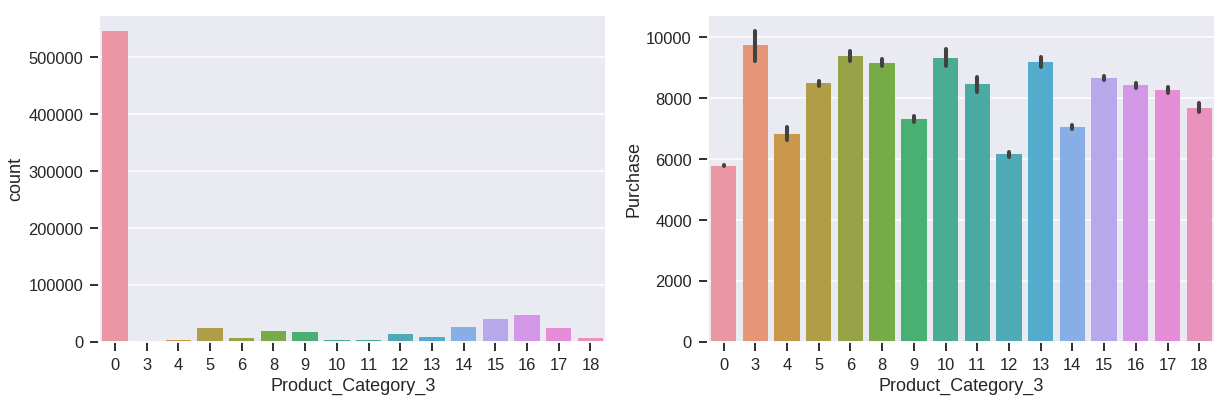

In [0]:
plt.figure(figsize = (20, 6))

plt.subplot2grid((1, 2), (0, 0))
sns.countplot(data['Product_Category_3'].astype('int'))

plt.subplot2grid((1, 2), (0, 1))
sns.barplot(data['Product_Category_3'].astype('int'), data['Purchase'])

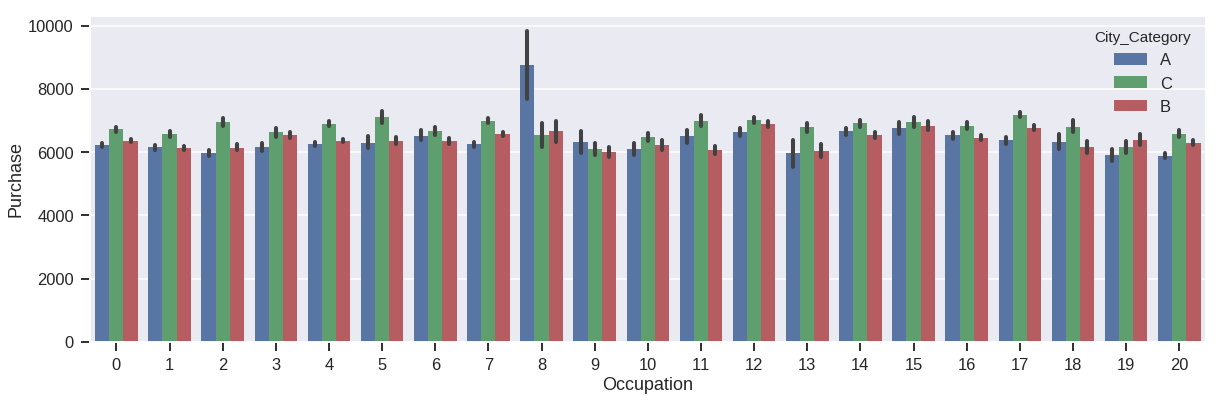

In [0]:
plt.figure(figsize = (20, 6))
sns.barplot('Occupation', 'Purchase', hue = 'City_Category', data = data)

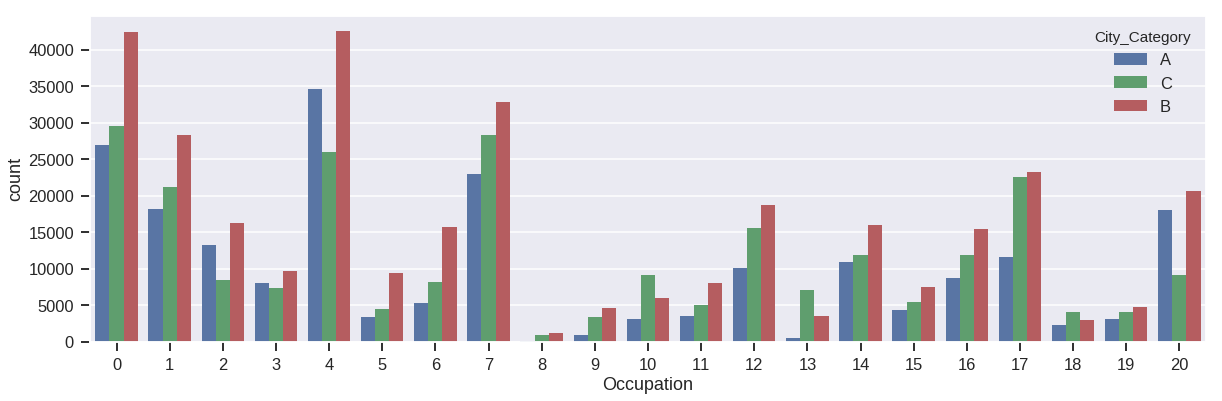

In [0]:
plt.figure(figsize = (20, 6))
sns.countplot('Occupation', hue = 'City_Category', data = data)

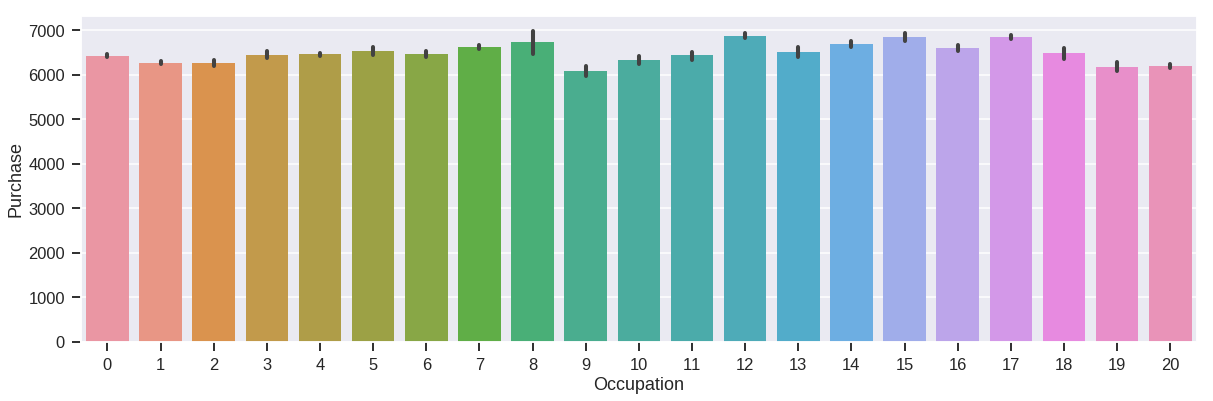

In [0]:
plt.figure(figsize = (20, 6))
sns.barplot('Occupation', 'Purchase', data = data)

# Data Preprocessing

In [0]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969.0


In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Gender'] = le.fit_transform(data['Gender'])

In [0]:
data['Product_Category_2'] = data['Product_Category_2'].astype('int')
data['Product_Category_3'] = data['Product_Category_3'].astype('int')

In [0]:
data.drop(['User_ID', 'Product_ID', 'Occupation', 'Marital_Status'], axis = 1, inplace = True)

In [0]:
age = pd.get_dummies(data['Age'])
city_category = pd.get_dummies(data['City_Category'])
stay_years = pd.get_dummies(data['Stay_In_Current_City_Years'])
pc1 = pd.get_dummies(data['Product_Category_1'])
pc2 = pd.get_dummies(data['Product_Category_2'])
pc3 = pd.get_dummies(data['Product_Category_3'])
user_category = pd.get_dummies(data['User_Category'])
product_category = pd.get_dummies(data['Product_Category'])
#product_1 = pd.get_dummies(data['Product_1'])

In [0]:
age = age.drop('0-17', axis = 1)
city_category = city_category.drop('A', axis = 1)
stay_years = stay_years.drop('4+', axis = 1)

In [0]:
pc1.drop([1], axis = 1, inplace = True)
pc2.drop([0], axis = 1, inplace = True)
pc3.drop([0], axis = 1, inplace = True)
user_category.drop([1], axis = 1, inplace = True)
product_category.drop([1], axis = 1, inplace = True)

In [0]:
#product_1.drop([1], axis = 1, inplace = True)

In [0]:
data2 = data.drop(['Age', 'City_Category', 'Stay_In_Current_City_Years', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'User_Category', 'Product_Category'], axis = 1)

In [0]:
data2 = pd.concat([age, city_category, stay_years, pc1, pc2, pc3, user_category, product_category, data2], axis = 1)

In [0]:
data2.head()

,18-25,26-35,36-45,46-50,51-55,55+,B,C,0,1,2,3,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,2,3,4,5,2,3,4,5,2,3,4,5,6,7,8,9,10,Gender,Purchase
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,8370.0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,15200.0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1422.0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1057.0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,7969.0


In [0]:
train_set = data2.iloc[: train.shape[0]]
test_set = data2.iloc[train.shape[0] :]

## Detection end removal of outliers

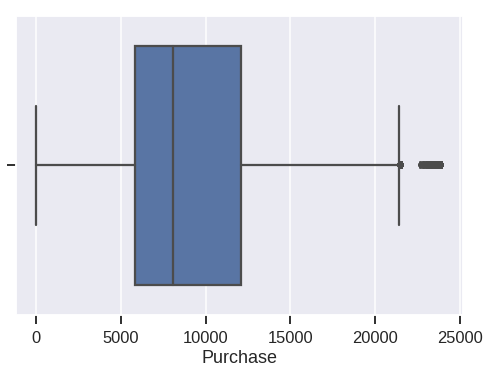

In [0]:
sns.boxplot(train_set['Purchase'])

In [0]:
def detect_outliers(df):
  q1, q3 = np.percentile(df, [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)

  return lower_bound, upper_bound

In [0]:
detect_outliers(train_set['Purchase'])

(-3523.5, 21400.5)

In [0]:
train_set = train_set[train_set['Purchase'] < 21400.5]

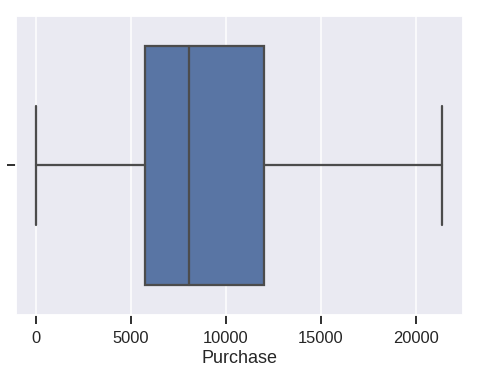

In [0]:
sns.boxplot(train_set['Purchase'])

## Split data into train and test set

In [0]:
X = train_set.drop(['Purchase'], axis = 1)
y = train_set['Purchase']

In [0]:
X_test = test_set.drop(['Purchase'], axis = 1)

# Building model

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [0]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [0]:
#y_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

'''from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)'''

'from sklearn.metrics import mean_squared_error\nmse = mean_squared_error(y_train, y_pred)\nrmse = np.sqrt(mse)'

In [0]:
rmse

2778.021933939483

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring = 'neg_mean_squared_error', cv = 5)

In [0]:
np.sqrt(-scores)

array([2796.5945977 , 2793.09282457, 2786.33630705, 2792.4103394 ,
       2793.67086585])

In [0]:
product_category_1 = train.groupby('Product_Category_1')['Purchase'].mean()

In [0]:
np.percentile(product_category_1, [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

array([  687.2086691 ,  2133.89957167,  4171.54721546,  6995.41011789,
       10133.73262475, 12007.81152577, 13954.16412797, 14931.83658459,
       15891.19965477, 19675.57092683])

In [0]:
product_category_2 = train.groupby('Product_Category_2')['Purchase'].mean()

In [0]:
np.percentile(product_category_2, [20, 30, 60, 90, 100])

array([ 7609.72158343,  9010.3733624 , 10250.03251115, 12349.87338766,
       15648.72954321])

In [0]:
product_category_3 = train.groupby('Product_Category_3')['Purchase'].mean()

In [0]:
np.percentile(product_category_3, [10, 25, 40, 70, 100])

array([ 9897.66981203, 10712.83899193, 11897.11158568, 12887.80908581,
       13939.69657423])